In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# initialise constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

In [3]:
#multiply
result = tf.multiply(x1,x2)

In [4]:
# print result
print (result)
# only printing the computational graph, results not actually computed

Tensor("Mul:0", shape=(4,), dtype=int32)


In [5]:
# intialise session
sess = tf.Session()

# print result
print(sess.run(result))

# close session
sess.close()

[ 5 12 21 32]


In [6]:
# can also do this:
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

[ 5 12 21 32]


In [7]:
from skimage import io

# load data method
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
    return images, labels

In [8]:
ROOT_PATH = "data"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

In [9]:
images = np.array(images)
labels = np.array(labels)

In [10]:
# Print the `images` dimensions
print(images.ndim)

# Print the number of `images`'s elements
print(images.size)

# Print the first instance of `images`
images[0]

1
4575


array([[[155, 185, 171],
        [142, 170, 152],
        [123, 166, 142],
        ..., 
        [168, 138, 111],
        [171, 141, 115],
        [174, 144, 117]],

       [[158, 186, 167],
        [130, 163, 139],
        [122, 164, 140],
        ..., 
        [163, 132, 106],
        [169, 138, 112],
        [175, 145, 119]],

       [[173, 198, 174],
        [145, 180, 153],
        [131, 170, 148],
        ..., 
        [166, 134, 108],
        [174, 143, 117],
        [180, 149, 124]],

       ..., 
       [[124, 133,  90],
        [121, 124,  86],
        [103, 104,  70],
        ..., 
        [ 57,  66,  57],
        [ 54,  63,  54],
        [ 51,  59,  50]],

       [[108, 127,  87],
        [104, 120,  84],
        [111, 125,  91],
        ..., 
        [ 54,  62,  54],
        [ 51,  58,  50],
        [ 49,  55,  47]],

       [[ 88, 113,  77],
        [ 85, 109,  76],
        [ 88, 109,  78],
        ..., 
        [ 55,  61,  54],
        [ 52,  57,  50],
        [ 49,  53,

In [11]:
# Print the `labels` dimensions
print(labels.ndim)

# Print the number of `labels`'s elements
print(labels.size)

# Count the number of labels
print(len(set(labels)))

1
4575
62


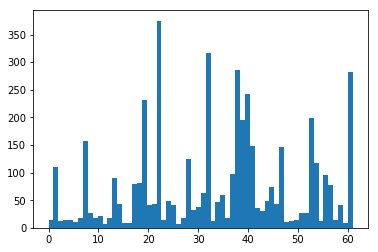

In [12]:
# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

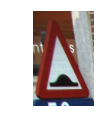

shape: (192, 123, 3), min: 12, max: 255


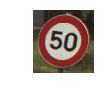

shape: (131, 127, 3), min: 0, max: 228


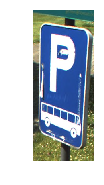

shape: (379, 153, 3), min: 0, max: 255


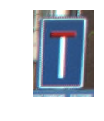

shape: (100, 70, 3), min: 29, max: 255


In [13]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

In [14]:
labels = list(labels)

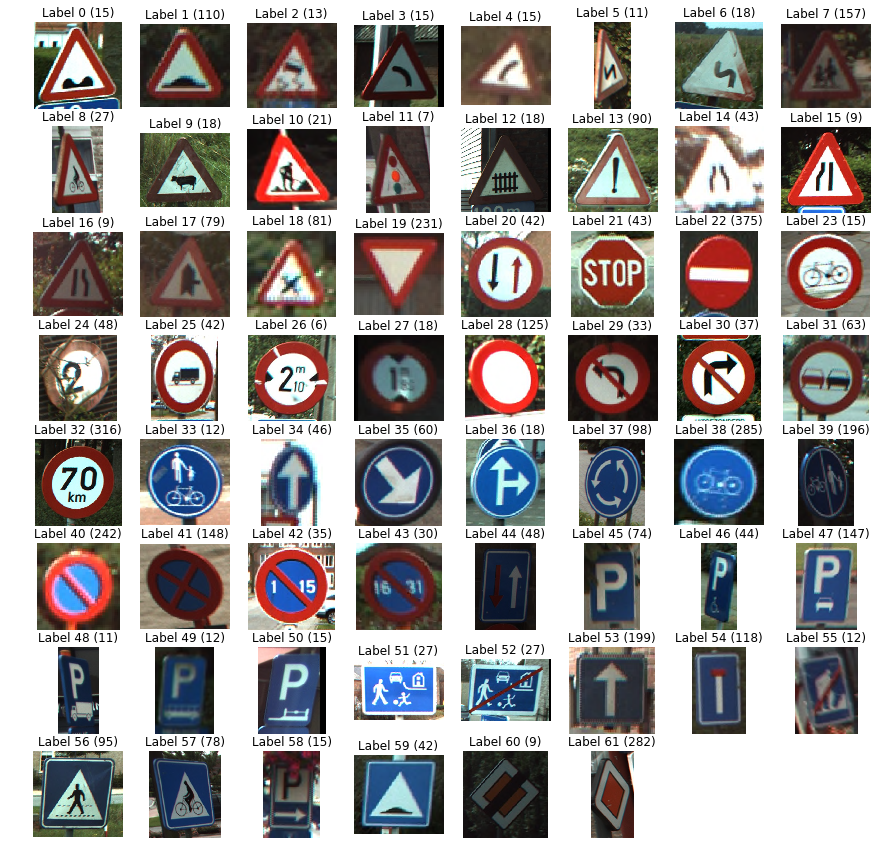

In [15]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

#### Scaling images

In [16]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

# Convert `images28` to an array
images28 = np.array(images28)

images.shape

/home/yuheng/anaconda3/envs/dl/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(4575,)

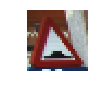

shape: (28, 28, 3), min: 0.06295518207282927, max: 0.9911264505802321


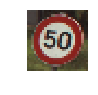

shape: (28, 28, 3), min: 0.01924894957983331, max: 0.8613595438175273


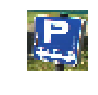

shape: (28, 28, 3), min: 0.08464760904361561, max: 1.0


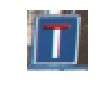

shape: (28, 28, 3), min: 0.13669467787114803, max: 1.0


In [17]:
# Same random images, rescaled
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

In [18]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

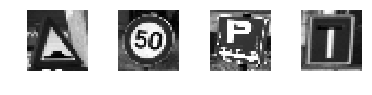

In [19]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [20]:
# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

/home/yuheng/anaconda3/envs/dl/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [21]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [22]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [23]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(1001):
        _, accuracy_val = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
        if i % 100 == 0:
            print('EPOCH', i, "Loss:", accuracy_val)

EPOCH 0 Loss: 4.26848
EPOCH 100 Loss: 3.49189
EPOCH 200 Loss: 3.16479
EPOCH 300 Loss: 2.90302
EPOCH 400 Loss: 2.69283
EPOCH 500 Loss: 2.5254
EPOCH 600 Loss: 2.39024
EPOCH 700 Loss: 2.27855
EPOCH 800 Loss: 2.18463
EPOCH 900 Loss: 2.10439
EPOCH 1000 Loss: 2.03448


[22, 7, 12, 49, 30, 61, 19, 53, 39, 46]
[22  7  7 19 61 61 19 19 39 19]


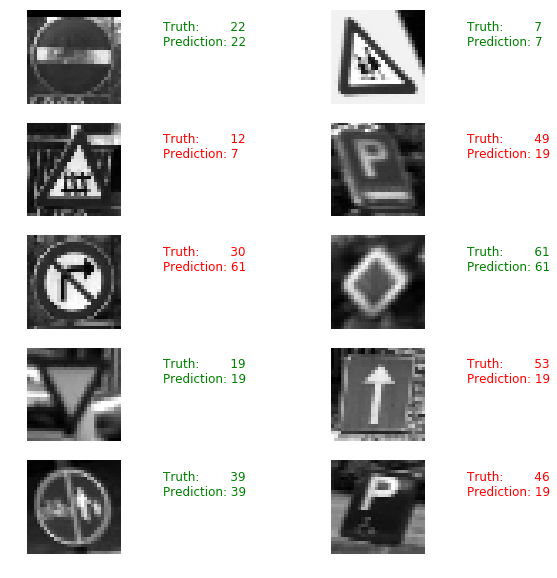

In [24]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [25]:
# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.437


In [26]:
sess.close()

##  OR

In [28]:
tf.set_random_seed(1234)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1001):
        _, loss_value = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
        if i % 100 == 0:
            print('EPOCH', i, "Loss:", loss_value)
            
    # Run predictions against the full test set.
    predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]
    # Calculate correct matches 
    match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
    # Calculate the accuracy
    accuracy = match_count / len(test_labels)
    # Print the accuracy
    print("Accuracy: {:.3f}".format(accuracy))

EPOCH 0 Loss: 4.2072
EPOCH 10 Loss: 4.06073
EPOCH 20 Loss: 3.93948
EPOCH 30 Loss: 3.84749
EPOCH 40 Loss: 3.77887
EPOCH 50 Loss: 3.72602
EPOCH 60 Loss: 3.68445
EPOCH 70 Loss: 3.64972
EPOCH 80 Loss: 3.61865
EPOCH 90 Loss: 3.58938
EPOCH 100 Loss: 3.56108
EPOCH 110 Loss: 3.53353
EPOCH 120 Loss: 3.50662
EPOCH 130 Loss: 3.48036
EPOCH 140 Loss: 3.45473
EPOCH 150 Loss: 3.42972
EPOCH 160 Loss: 3.40529
EPOCH 170 Loss: 3.38143
EPOCH 180 Loss: 3.35813
EPOCH 190 Loss: 3.33538
EPOCH 200 Loss: 3.31315
Accuracy: 0.299
